In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import opening,closing,disk

In [2]:
# find optimal threshold in an histogram h from an initial threshold t
def optimal_threshold(h,t):
    # Cut distribution in 2
    g1 = h[:t]
    g2 = h[t:]
    # Compute the centroids
    m1 = (g1*np.arange(0,t)).sum()/g1.sum()
    m2 = (g2*np.arange(t,len(h))).sum()/g2.sum()
    # Compute the new threshold
    t2 = int((m1+m2)/2)
    print(m1,m2,t2)
    
    if( t2 != t ) : return optimal_threshold(h,t2)
    return t2

(218, 180, 3)
(218, 180)
[0.         0.00243566 0.00487132 0.00730699 0.00974265 0.01217831
 0.01461397 0.01704963 0.01948529 0.02192096 0.02435662 0.02679228
 0.02922794 0.0316636  0.03409926 0.03653493 0.03897059 0.04140625
 0.04384191 0.04627757 0.04871324 0.0511489  0.05358456 0.05602022
 0.05845588 0.06089154 0.06332721 0.06576287 0.06819853 0.07063419
 0.07306985 0.07550551 0.07794118 0.08037684 0.0828125  0.08524816
 0.08768382 0.09011949 0.09255515 0.09499081 0.09742647 0.09986213
 0.10229779 0.10473346 0.10716912 0.10960478 0.11204044 0.1144761
 0.11691176 0.11934743 0.12178309 0.12421875 0.12665441 0.12909007
 0.13152574 0.1339614  0.13639706 0.13883272 0.14126838 0.14370404
 0.14613971 0.14857537 0.15101103 0.15344669 0.15588235 0.15831801
 0.16075368 0.16318934 0.165625   0.16806066 0.17049632 0.17293199
 0.17536765 0.17780331 0.18023897 0.18267463 0.18511029 0.18754596
 0.18998162 0.19241728 0.19485294 0.1972886  0.19972426 0.20215993
 0.20459559 0.20703125 0.20946691 0.21

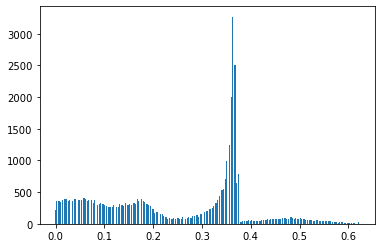

In [44]:
#for colorful image
from skimage.color import rgb2hsv

def distance_color_space(im,coords):
    refcolor=im[coords[0],coords[1]]
    dmap=np.sqrt(((im-refcolor)**2).sum(axis=2))
    return dmap

im=imread('mri_brain.jpg')
hsv=rgb2hsv(im)
print(im.shape)
# im1=imread('mri_brain.jpg')
# print(im1.shape)

coords=(50,50)

dmap=distance_color_space(hsv.astype('float'),coords)
print(dmap.shape)
h,bins=np.histogram(dmap.flatten(),bins=256)

plt.figure()
print(bins)
print(bins.shape)
print(bins.shape[:-1])
print(bins[:-1].shape)
print(bins[1]-bins[0])
plt.bar(bins[:-1],h,bins[1]-bins[0])
plt.show()

In [43]:
b=optimal_threshold(h,127)
print(b)
t=(bins[b]+bins[b+1])/2
print(t)
print(bins[b])

49.29127065360433 154.56449286973242 101
42.96435061464457 151.064637116415 97
42.460953510948116 150.63817760170065 96
42.205646472309525 150.4068603867988 96
96
0.23504136029411765
0.2338235294117647


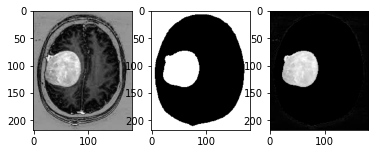

The surface of the tumour is about 46 cm^2


In [33]:
# print(dmap)
mask=dmap>t
mask=closing(opening(mask,disk(5)),disk(5))

im_m=im.copy()
im_m[mask==False]=0


plt.figure()
plt.subplot(1,3,1)
plt.imshow(dmap,cmap=plt.cm.gray)
# plt.imshow(im,cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(mask,cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(im_m,cmap=plt.cm.gray)
plt.show()

# print(mask.shape)
# print(mask[100,50])
# print(im_m[90,30])

pixels=0
for y in range(im_m.shape[0]):                  
    for x in range(im_m.shape[1]):
        if(im_m[y,x][0]>120):
            pixels+=1
# print(pixels)
surface=0.115**2*pixels
print("The surface of the tumour is about %d cm^2"%(surface))

